In [1]:
from google import colab
colab.drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 목표
파이토치 MLP 활용  
데이터 : Dacon 잡케어 추천 알고리즘대최 -> 설문 형식의 데이터  
모두 명목형 변수이지만 순서가 의미가 있는 특성도 존재

In [2]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/잡케어/Jobcare_data/"

In [83]:
import pandas as pd
import numpy as np
from typing import List ,Dict, Tuple

train = pd.read_csv(f'{DATA_PATH}train.csv')
test = pd.read_csv(f'{DATA_PATH}test.csv')

d_code = pd.read_csv(f'{DATA_PATH}속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv(f'{DATA_PATH}속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv(f'{DATA_PATH}속성_L_코드.csv', index_col=0).T.to_dict()

train.shape , test.shape

((501951, 35), (46404, 34))

In [4]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [5]:
df_train = add_code(train, d_code, h_code, l_code)
df_test = add_code(test, d_code, h_code, l_code)

데이터를 한 데이터 프레임으로 합치는 과정

In [6]:
cols_drop = ["id","person_prefer_f","person_prefer_g","person_rn" ,"contents_rn","contents_open_dt"]
df_test = df_test.drop(cols_drop, axis = 1)

df_train_y = df_train['target']
cols_drop .append('target')
df_train = df_train.drop(cols_drop, axis = 1)

In [21]:
df_train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
      

In [86]:
col_cat = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn','person_attribute_a', 'person_prefer_c',
       'contents_attribute_i', 'contents_attribute_a','contents_attribute_j_1', 
       'contents_attribute_j','contents_attribute_c', 'contents_attribute_k', 'contents_attribute_m'
       ]
col_numeric = ['person_attribute_a_1','person_attribute_b','person_prefer_e','contents_attribute_e']

In [87]:
df_train.iloc[:,6:]

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,352,347,346,2006
501947,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,155,138,99,2006
501948,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,437,417,407,2006
501949,1,1,2,1,46,147,145,4,251,49,258,3,2,5,1,1,2,660,147,3,4,259,46,43,2,1,145,123,56,1,145,123,56,1,145,123,56,1,250,518,48,359,250,523,250,524,659,652,651,2006


In [88]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
df_onehot = onehot.fit_transform(df_train[col_cat])
df_onehot

<501951x47 sparse matrix of type '<class 'numpy.float64'>'
	with 7529265 stored elements in Compressed Sparse Row format>

In [89]:
df_onehot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

원핫인코딩을 진행하고 순서가 있는 명목형 변수는 원핫인코딩을 진행하지 않음

#### 다중회귀 구현

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [117]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(2021)
if device == 'cuda':
    torch.cuda.manual_seed_all(2021)

In [129]:
x_train_1 = torch.from_numpy(df_onehot.toarray()).float()
x_train_2 = torch.from_numpy(df_train[col_numeric].to_numpy())
y_train = torch.from_numpy(df_train_y.to_numpy())

In [130]:
x_train = torch.cat([x_train_1, x_train_2], dim=1)
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=2021,stratify= y_train)

In [131]:
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)

In [132]:
loss_fn = nn.CrossEntropyLoss().to(device)
model = nn.Sequential(   
          nn.Linear(51, 100, bias=True), 
          nn.ReLU(),
          nn.Linear(100, 300, bias=True), 
          nn.ReLU(),
          nn.Linear(300, 100, bias=True), 
          nn.ReLU(),
          nn.Linear(100, 2, bias=True),
          nn.Sigmoid()
          ).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2) 

In [133]:
losses = []
val_losses = []
epochs = 100
for epoch in range(epochs + 1):

    optimizer.zero_grad()
    # forward 연산
    prediction = model(X_train)

    # 비용 함수
    cost = loss_fn(prediction, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())  # 값만 가져오기 위해서 .item()

    y_pred = model(X_val)
    cost2 = loss_fn(y_pred, y_val)
    val_losses.append(cost2.item())
    # 10의 배수에 해당되는 에포크마다 비용을 출력
    print('Epoch {:4d}/{} Cost: {:.6f} Val_Cost: {:.6f}'.format(
        epoch, epochs, cost.item(), cost2.item()))

Epoch    0/100 Cost: 0.693641 Val_Cost: 0.698574
Epoch    1/100 Cost: 0.698564 Val_Cost: 0.696406
Epoch    2/100 Cost: 0.696480 Val_Cost: 0.693689
Epoch    3/100 Cost: 0.693756 Val_Cost: 0.691733
Epoch    4/100 Cost: 0.691819 Val_Cost: 0.689715
Epoch    5/100 Cost: 0.689867 Val_Cost: 0.686934
Epoch    6/100 Cost: 0.687227 Val_Cost: 0.683235
Epoch    7/100 Cost: 0.683822 Val_Cost: 0.679514
Epoch    8/100 Cost: 0.680281 Val_Cost: 0.678283
Epoch    9/100 Cost: 0.679213 Val_Cost: 0.681807
Epoch   10/100 Cost: 0.683393 Val_Cost: 0.685798
Epoch   11/100 Cost: 0.686748 Val_Cost: 0.677909
Epoch   12/100 Cost: 0.678977 Val_Cost: 0.678004
Epoch   13/100 Cost: 0.679277 Val_Cost: 0.676331
Epoch   14/100 Cost: 0.677367 Val_Cost: 0.675144
Epoch   15/100 Cost: 0.675852 Val_Cost: 0.677413
Epoch   16/100 Cost: 0.677958 Val_Cost: 0.676409
Epoch   17/100 Cost: 0.676977 Val_Cost: 0.674737
Epoch   18/100 Cost: 0.675408 Val_Cost: 0.674689
Epoch   19/100 Cost: 0.675467 Val_Cost: 0.673876
Epoch   20/100 Cost:

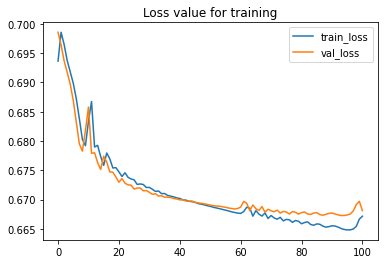

In [134]:
import matplotlib.pyplot as plt
plt.title('Loss value for training')
plt.plot(losses, label = 'train_loss')
plt.plot(val_losses, label = 'val_loss')
plt.legend()
plt.show()

In [135]:
with torch.no_grad():

    #model = model.to('cpu')
    y_pred = model(X_val)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    accuracy = (accuracy_score(predicted,y_val))
    print(accuracy)

0.5886536597027612


1주차에 배웠던 활성화 함수와 최적화 함수를 사용하려 했으나.. 모델의 성능이 0.49로 이진 분류인 것을 생각하면 매우 낮은 성능을 보였음  
epoch는 학습 양상을 보며 100으로 설정  
> 활성화 함수를 Relu, 최적화 방식을 Adam 알고리즘을 사용했을 때는 0.59정도의 성능을 보임  

한계와 개선할 점 : 명목형 변수가 많아 정확한 예측을 하기 힘든 것 같다. 전처리의 개선이 필요하며 과적합을 막기위한 정규화 또한 개선에 도움을 줄 것 같다.